In [1]:
from edgar_prelim import *
import pandas as pd
%load_ext autoreload
%autoreload 2
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
cik='0000004962'

In [3]:
# Parameters
cik = "0001329517"


# Company

In [4]:
cik_df = pd.read_sql(text("select cik, sic, sic_description, company_name, ticker from cik where cik = :cik").bindparams(cik=cik), prelim_engine)
cik_df.rename({'cik': 'CIK', 'sic': 'SIC', 'sic_description': 'Description', 'company_name': 'Name', 'ticker': 'Ticker'}, axis=1).T.rename({0: ''}, axis=1)

,
CIK,0001329517
SIC,6035
Description,"SAVINGS INSTITUTION, FEDERALLY CHARTERED"
Name,WATERSTONE FINANCIAL INC
Ticker,WSBF


In [5]:
prelims = query_prelims(cik)

# Summary Statistics

In [6]:
prelims.groupby('item').item_value.describe()

,count,mean,std,min,25%,50%,75%,max
item,,,,,,,,
book value per share,6.0,6.170000e+00,8.677327e-01,5.39,5.425000e+00,5.95,6.88,7.29
interest income,9.0,3.816644e+07,3.448375e+07,15533000.00,1.618600e+07,24645000.00,28087000.00,98488000.00
net income,11.0,1.744818e+06,1.583325e+07,-28187000.00,-4.796000e+06,2284000.00,4776000.00,34914000.00
net interest income,11.0,2.114482e+07,1.559903e+07,8578000.00,9.772000e+06,10959000.00,36817500.00,43911000.00
provision for loan losses,11.0,9.096727e+06,1.091245e+07,358000.00,1.100000e+06,2845000.00,15800500.00,26687000.00


# Plots

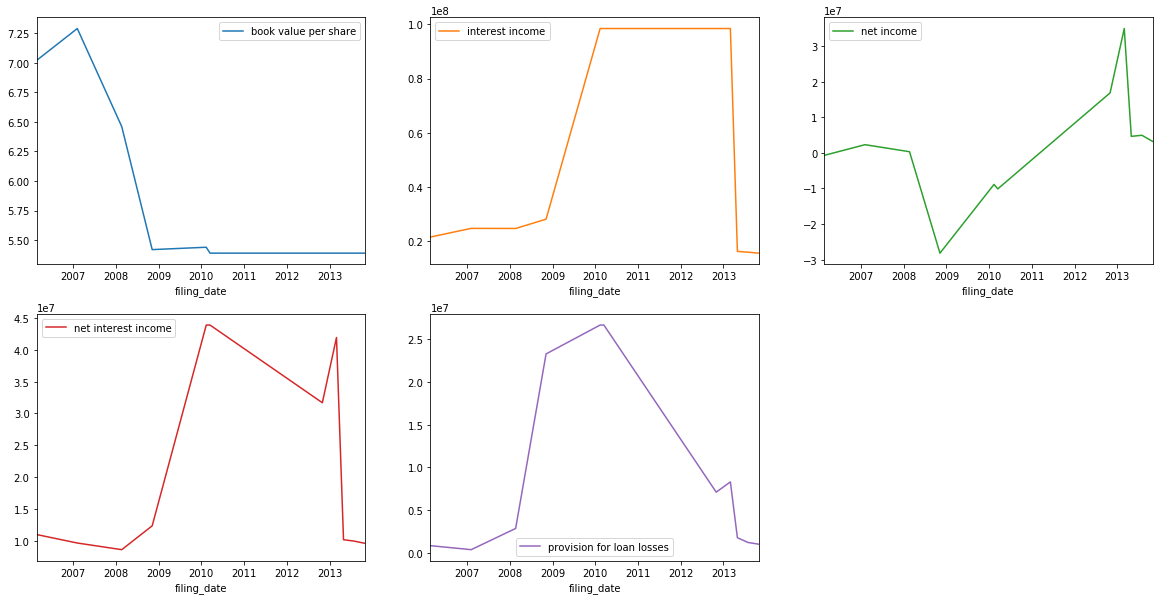

In [7]:
_ = prelims.set_index('filing_date').pivot(columns='item', values='item_value').fillna(method="ffill").plot(subplots=True, layout=(2, 3), figsize=(20, 10), sharex=False)

# Quality

In [8]:
validate_prelims(prelims)

period msg_type  \
cik        item                                                               
0001329517 book value per share        2006Q1 to 2006Q3: 3 periods  missing   
           book value per share        2007Q1 to 2007Q3: 3 periods  missing   
           book value per share        2008Q1 to 2008Q2: 2 periods  missing   
           book value per share        2008Q4 to 2009Q3: 4 periods  missing   
           book value per share       2010Q1 to 2013Q3: 15 periods  missing   
           interest income             2006Q1 to 2006Q3: 3 periods  missing   
           interest income             2007Q1 to 2007Q3: 3 periods  missing   
           interest income             2008Q1 to 2008Q2: 2 periods  missing   
           interest income             2008Q4 to 2009Q3: 4 periods  missing   
           interest income            2010Q1 to 2012Q4: 12 periods  missing   
           net income                  2006Q1 to 2006Q3: 3 periods  missing   
           net income                  2007Q1 to 2007Q3: 3 periods  missing   
           net income                  2008Q1 to 2008Q2: 2 periods  missing   
           net income                  2008Q4 to 2009Q3: 4 periods  missing   
           net income                 2010Q1 to 2012Q2: 10 periods  missing   
           net interest income         2006Q1 to 2006Q3: 3 periods  missing   
           net interest income         2007Q1 to 2007Q3: 3 periods  missing   
           net interest income         2008Q1 to 2008Q2: 2 periods  missing   
           net interest income         2008Q4 to 2009Q3: 4 periods  missing   
           net interest income        2010Q1 to 2012Q2: 10 periods  missing   
           provision for loan losses   2006Q1 to 2006Q3: 3 periods  missing   
           provision for loan losses   2007Q1 to 2007Q3: 3 periods  missing   
           provision for loan losses   2008Q1 to 2008Q2: 2 periods  missing   
           provision for loan losses   2008Q4 to 2009Q3: 4 periods  missing   
           provision for loan losses  2010Q1 to 2012Q2: 10 periods  missing   
           total revenue                                      None    empty   

                                                 message  
cik        item                                           
0001329517 book value per share           Missing period  
           book value per share           Missing period  
           book value per share           Missing period  
           book value per share           Missing period  
           book value per share           Missing period  
           interest income                Missing period  
           interest income                Missing period  
           interest income                Missing period  
           interest income                Missing period  
           interest income                Missing period  
           net income                     Missing period  
           net income                     Missing period  
           net income                     Missing period  
           net income                     Missing period  
           net income                     Missing period  
           net interest income            Missing period  
           net interest income            Missing period  
           net interest income            Missing period  
           net interest income            Missing period  
           net interest income            Missing period  
           provision for loan losses      Missing period  
           provision for loan losses      Missing period  
           provision for loan losses      Missing period  
           provision for loan losses      Missing period  
           provision for loan losses      Missing period  
           total revenue              No values for item

# Data

In [9]:
def make_clickable(val: str) -> str: 
    if isinstance(val, str):
        name, url = val.split('#')
        return f'<a href="{url}">{name}</a>'
    else:
        return ''

(prelims
 .assign(fiscal_period = prelims.fiscal_period.str.cat(prelims.filing_href, sep='#'), filing_date = prelims.filing_date.map(lambda d: d.strftime('%Y-%m-%d')))
 .loc[:, ['filing_date', 'fiscal_period', 'item', 'item_value', 'src_table', 'src_row', 'src_column', 'src_value', 'src_units']]
 .set_index(['filing_date', 'item'])
 .style.format({'fiscal_period': make_clickable})
)

In [10]:
#discard_prelim(cik, date(2019, 12, 31))
#force_reload_prelim(cik, date(2019, 12, 31), delete_filings=False)
#force_reload_prelim_between(cik,  start=date(2002, 6, 1), end=date(2019, 12, 31), delete_filings=False)

In [11]:
#d = date(2018, 10, 29)
#extract_prelim_statements(cik, start=d, end=d)

In [12]:
#d = date(2019, 4, 22)
#filings = query_edgar_for_filings(cik, "8-K", start=d, end=d, require_xbrl=False)
#report = query_edgar_for_submission_text(filings[0].href)
#submission = load_submission(report.href)
#tables = list(parse_tables(submission))
#items_from_tables(tables)

In [13]:
#widget = query_prelims_for_override(cik, filing_date='2006-01-27', item=None)
#widget

In [14]:
#widget.save()